Final output

Import datagenerator to train and test

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [44]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range=0.2,zoom_range= 0.2,horizontal_flip=True,vertical_flip=False)

In [45]:
test_datagen = ImageDataGenerator(rescale = 1./255)


In [46]:
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
from PIL import Image
import pathlib

In [47]:
from keras.preprocessing import image
# and use 
# image.ImageDataGenerator()
# image.load_img()

Apply ImageDataGenerator Functionality To Train And Test set

In [48]:
from google.colab import drive

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print("This dataset has been created and uploaded by IBM-TeamID-IBM-Project-PNT2022TMID00995")

This dataset has been created and uploaded by IBM-TeamID-IBM-Project-PNT2022TMID00995


In [50]:
x_train= train_datagen.flow_from_directory(r"/content/drive/MyDrive/IBM PROJECT/DATA COLLECTION/training_set",target_size=(64,64),class_mode="categorical",batch_size=48)

Found 15130 images belonging to 9 classes.


In [51]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/IBM PROJECT/DATA COLLECTION/test_set",target_size= (64,64),class_mode= "categorical",batch_size=48)

Found 2250 images belonging to 9 classes.


In [52]:
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

In [53]:
x_test.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

MODEL BUILDING

In [54]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

In [55]:
model=Sequential()


In [56]:
model.add(Convolution2D(32,(3,3), input_shape=(64,64,1), activation = 'relu'))

In [57]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [58]:
model.add(Flatten())

In [59]:
model.add(Dense( units=512, activation='relu'))

In [60]:
model.add(Dense(units=9, activation='softmax'))

In [61]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
model.save('Realtime.h5')

In [63]:
a=len(x_train)
b=len(x_test)

Length of training and testing data

In [64]:
print(a)
print(b)

316
47


TEST THE MODEL



In [65]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

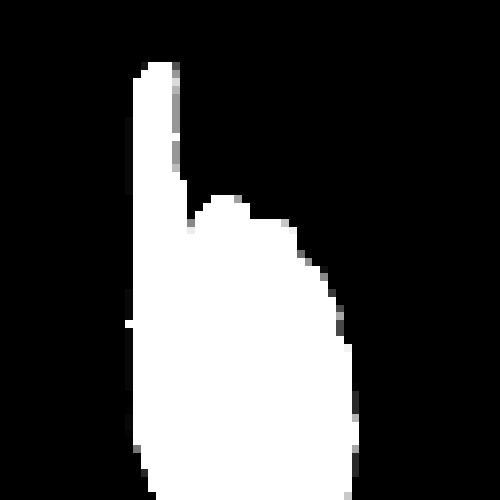

In [76]:
img = image.load_img('/content/drive/MyDrive/IBM PROJECT/DATA COLLECTION/test_set/D/101.png',target_size = (500,500))
img

In [67]:
from skimage.transform import resize
arr=image.img_to_array(frame)
arr = resize(arr,(64,64,1))
arr = np.expand_dims(arr,axis=0)
pred=np.argmax(model.predict(arr))
op=['A','B','C','D','E','F','G','H','I']
print("THE PREDICTED LETTER IS ",op[pred])

1/1 [==============================] - 0s 65ms/step
THE PREDICTED LETTER IS  D


In [69]:
from skimage.transform import resize
def detect(frame):
  img=resize(frame,(64,64,1))
  img=np.expand_dims(img,axis=0)
  if(np.max(img)>1):
    prediction=model.predict(img)
    print(prediction)
    prediction=model.predict_classes(img)
    print(prediction)

In [70]:
arr= image.img_to_array(img)

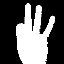

In [71]:
frame=cv2.imread('/content/drive/MyDrive/IBM PROJECT/DATA COLLECTION/test_set/F/107.png')
data=detect(frame)
from google.colab.patches import cv2_imshow
cv2_imshow(frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

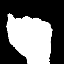

In [74]:
frame=cv2.imread('/content/drive/MyDrive/IBM PROJECT/DATA COLLECTION/test_set/A/102.png')
data=detect(frame)
from google.colab.patches import cv2_imshow
cv2_imshow(frame)
cv2.waitKey(0)
cv2.destroyAllWindows()


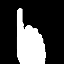

THE PREDICTED LETTER IS  D


In [75]:
frame=cv2.imread('/content/drive/MyDrive/IBM PROJECT/DATA COLLECTION/test_set/D/108.png')
data=detect(frame)
from google.colab.patches import cv2_imshow
cv2_imshow(frame)
cv2.waitKey(0)
cv2.destroyAllWindows()
print("THE PREDICTED LETTER IS ",op[pred])